**ANH HOANG**

**DSCI 633 FINAL PROJECT**

**FOREST COVERTYPE PREDICTION USING MACHINE LEARNING**

alh7256@g.rit.edu


**I. IMPORT PACKAGE AND DATASET**

In [14]:
# Import neccessary packages
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_covtype
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score, cross_validate


In [3]:
# Load the Forest Covertypes dataset
data = fetch_covtype(as_frame = 'TRUE')
# Convert data and target into a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add the target variable to the DataFrame
df['CoverType'] = data.target
df['CoverType'] = df['CoverType'] - 1

**II. DATA OVERVIEW**

In [ ]:
# Data head
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,CoverType
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
# Summary statistics
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,CoverType
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,1.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


In [4]:
# Shape
df.shape

(581012, 55)

In [ ]:
# Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [5]:
#Convert data from float to int
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype(int)

In [ ]:
# Check missing data
df.isna().sum().sum()

0

In [14]:
# Check duplicates
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

No duplicates found.


In [ ]:
# Convert Cover Type from 1-7 to 0-6
df['CoverType'].value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: CoverType, dtype: int64

**III. EXPLORATORY DATA ANALYSIS**

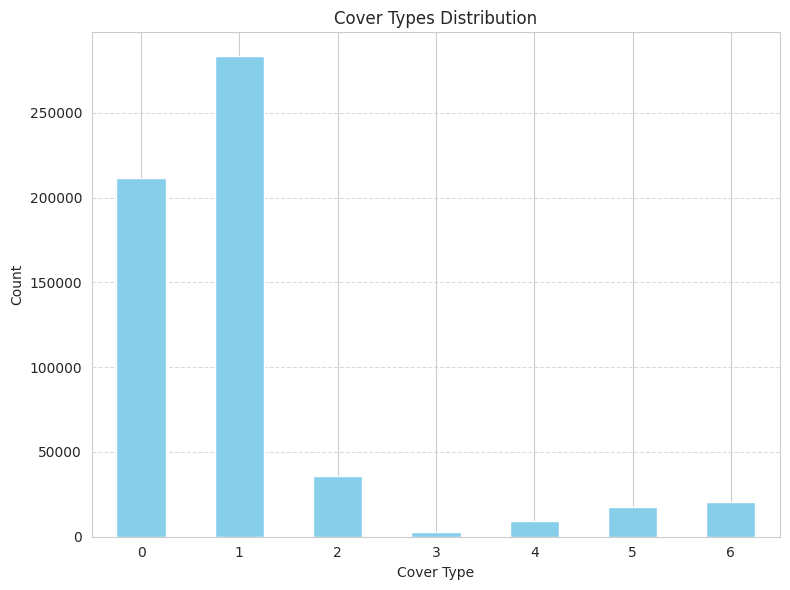

In [ ]:
# CoverType class distribution
plt.figure(figsize=(8, 6))
df['CoverType'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Cover Types Distribution')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

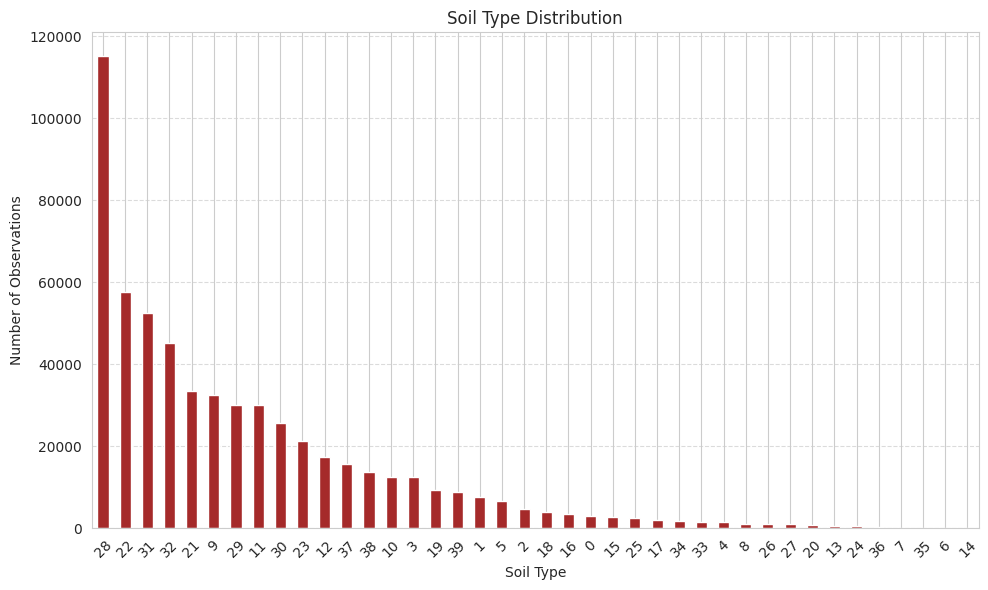

In [ ]:
# Soil Type class distribution
df['soil_type'] = 0
for i in range(0, 40):
    df['soil_type'] += i * df['Soil_Type_' + str(i)]

df['wArea'] = 0
for i in range(0, 4):
    df['wArea'] += i * df['Wilderness_Area_' + str(i)]
soil_type_counts = df.groupby('soil_type')['CoverType'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
soil_type_counts.plot(kind='bar', color='brown')
plt.title('Soil Type Distribution')
plt.xlabel('Soil Type')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

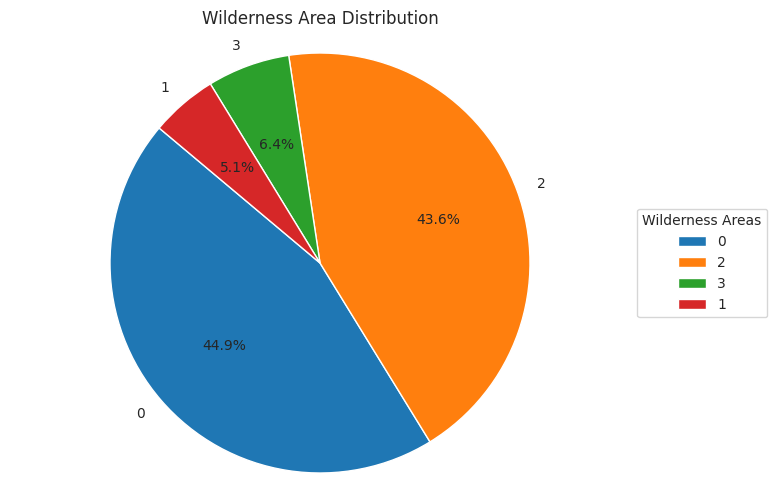

In [ ]:
#Wilderness area class distribution (by %)
wilderness_counts = df['wArea'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(wilderness_counts, labels=wilderness_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Wilderness Area Distribution')
plt.axis('equal')
plt.legend(wilderness_counts.index, title="Wilderness Areas", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
df.drop(['soil_type', 'wArea'], axis=1, inplace=True)

**We can conclude that this dataset is highly imbalanced, thus requiring appropriate resampling methods and models to evaluate.**

**IV. FUNCTIONS**

In [6]:
# Function to split and scale data
# Shuffle data with random seed, split 70/30 with stratify sampling and random state = 42, scale with Standard Scaler
def split_and_scale(df):
    df = df.copy()

    np.random.seed(0)

    # Split df into X and y
    y = df['CoverType'].copy()
    X = df.drop('CoverType', axis=1).copy()

    # shuffle the data
    shuffle = np.random.permutation(np.arange(X.shape[0]))
    X, y = X.iloc[shuffle], y.iloc[shuffle]

    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Function to split and scale data with SMOTE
# Same as above, add SMOTE
def split_and_scale_with_SMOTE(df):
    df = df.copy()

    np.random.seed(0)

    # Split df into X and y
    y = df['CoverType'].copy()
    X = df.drop('CoverType', axis=1).copy()

    # shuffle the data
    shuffle = np.random.permutation(np.arange(X.shape[0]))
    X, y = X.iloc[shuffle], y.iloc[shuffle]

    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # Apply SMOTE to the training set
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

    return X_train_smote, X_test_scaled, y_train_smote, y_test

def split_and_scale_with_sample(df, sample_size=0.2):
    df = df.copy()

    np.random.seed(0)

    # Split df into X and y
    y = df['CoverType'].copy()
    X = df.drop('CoverType', axis=1).copy()

    # shuffle the data
    shuffle = np.random.permutation(np.arange(X.shape[0]))
    X, y = X.iloc[shuffle], y.iloc[shuffle]

    # Train-test-split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # Create a sample from the scaled training dataset
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train_scaled, y_train, test_size=sample_size, random_state=42)

    return X_train_sample, X_test_scaled, y_train_sample, y_test


In [7]:
# Function to evaluate the model
# Generate confusion matrix and classification report
def evaluate_model(model, class_balance, X_test, y_test):

    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))

    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)

    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    print("Classification Report:\n----------------------\n", clr)

**V. MODEL TRAINING AND EVALUATION**

In [8]:
# Split dataset with and without SMOTE
imbalanced_df = df.copy()
imbalanced_df_SMOTE = df.copy()

X_train, X_test, y_train, y_test = split_and_scale(imbalanced_df)
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = split_and_scale_with_SMOTE(imbalanced_df_SMOTE)

   **MODEL 1: LOGISTIC REGRESSION**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Imbalanced Data): 72.29%


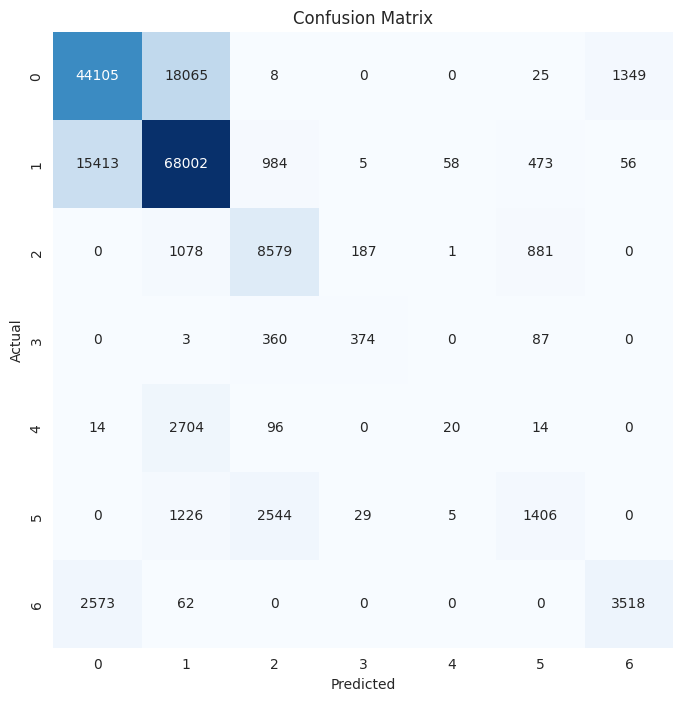

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.71      0.69      0.70     63552
           1       0.75      0.80      0.77     84991
           2       0.68      0.80      0.74     10726
           3       0.63      0.45      0.53       824
           4       0.24      0.01      0.01      2848
           5       0.49      0.27      0.35      5210
           6       0.71      0.57      0.64      6153

    accuracy                           0.72    174304
   macro avg       0.60      0.51      0.53    174304
weighted avg       0.71      0.72      0.71    174304



In [ ]:
# LR with normal split and scale function, with max_iter=1000
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
evaluate_model(model_lr, "Imbalanced Data", X_test, y_test)


Accuracy (Balanced Data with SMOTE): 72.29%


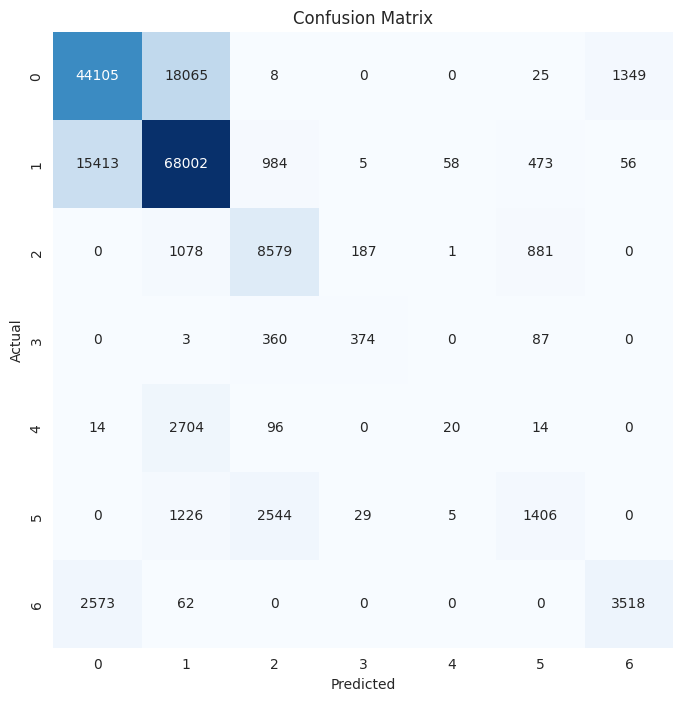

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.71      0.69      0.70     63552
           1       0.75      0.80      0.77     84991
           2       0.68      0.80      0.74     10726
           3       0.63      0.45      0.53       824
           4       0.24      0.01      0.01      2848
           5       0.49      0.27      0.35      5210
           6       0.71      0.57      0.64      6153

    accuracy                           0.72    174304
   macro avg       0.60      0.51      0.53    174304
weighted avg       0.71      0.72      0.71    174304



In [ ]:
# LR with SMOTE split and scale function, with max_iter = 1000
model_lr_SMOTE = LogisticRegression(max_iter=1000)
model_lr_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
evaluate_model(model_lr, "Balanced Data with SMOTE", X_test_SMOTE, y_test_SMOTE)

**Logistic Regression with and without SMOTE does not have much differences in the result.**

In [ ]:
# LR using overfitting resampling
oversampled_df = df.copy()
# Get the class with maximum size
max_class_size = np.max(oversampled_df['CoverType'].value_counts().values)
# Create subset using oversampling
class_subsets = [oversampled_df.query("CoverType == " + str(i)) for i in range(7)]

for i in range(7):
    class_subsets[i] = class_subsets[i].sample(max_class_size, replace=True, random_state=123)

oversampled_df = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=123).reset_index(drop=True)

# Train the data
X_train_os, X_test_os, y_train_os, y_test_os = split_and_scale(oversampled_df)

Accuracy (Oversampled Data): 70.73%


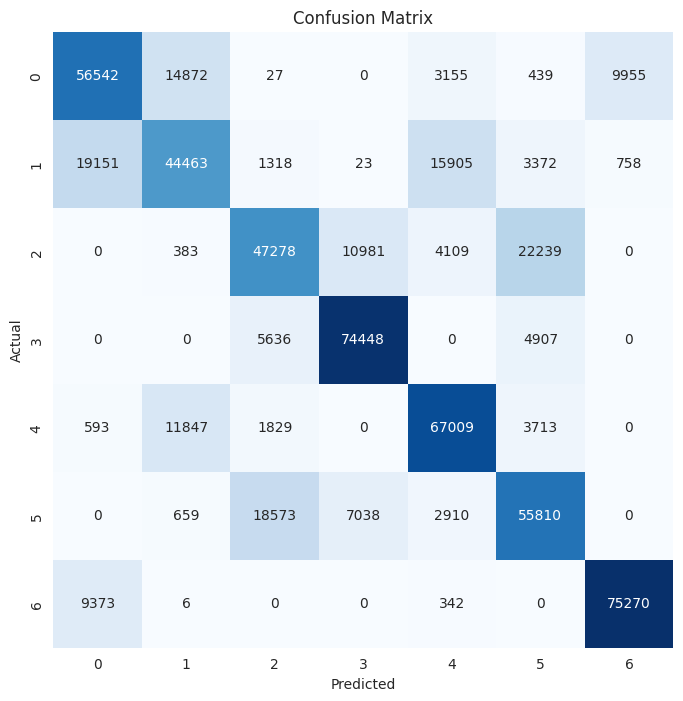

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.66      0.67      0.66     84990
           1       0.62      0.52      0.57     84990
           2       0.63      0.56      0.59     84990
           3       0.80      0.88      0.84     84991
           4       0.72      0.79      0.75     84991
           5       0.62      0.66      0.64     84990
           6       0.88      0.89      0.88     84991

    accuracy                           0.71    594933
   macro avg       0.70      0.71      0.70    594933
weighted avg       0.70      0.71      0.70    594933



In [ ]:
model_lr_os = LogisticRegression(max_iter=1000)
model_lr_os.fit(X_train_os, y_train_os)

evaluate_model(model_lr_os, "Oversampled Data", X_test_os, y_test_os)


**Overfitting Resampling reduces 1% of overall accuracy. However, it can increase the precision score of class 4 and 5 better compared to LR and LR-SMOTE.**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Weight Data): 59.58%


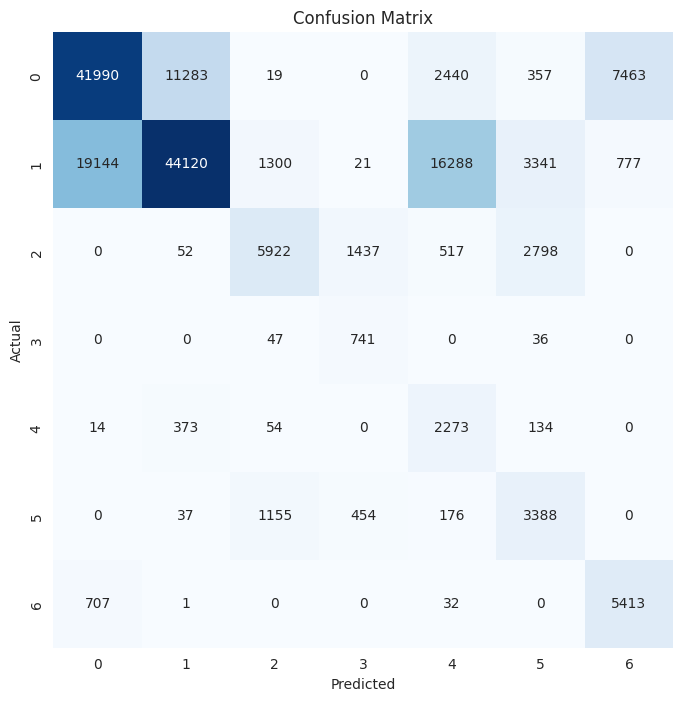

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.68      0.66      0.67     63552
           1       0.79      0.52      0.63     84991
           2       0.70      0.55      0.62     10726
           3       0.28      0.90      0.43       824
           4       0.10      0.80      0.18      2848
           5       0.34      0.65      0.44      5210
           6       0.40      0.88      0.55      6153

    accuracy                           0.60    174304
   macro avg       0.47      0.71      0.50    174304
weighted avg       0.70      0.60      0.63    174304



In [ ]:
#LR using balanced classs weight
model_lr_balanced = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model to the data
model_lr_balanced.fit(X_train, y_train)

# Predict on test data
y_pred = model_lr_balanced.predict(X_test)
evaluate_model(model_lr_balanced, "Weight Data", X_test, y_test)

**Balanced class weight does not work well in this case. The accuracy score is low.**

**MODEL 2: K-NEAREST NEIGHBOR**

In [ ]:
#kNN with normal split and scale function, n_neighbor = 5
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [ ]:
# Evaluate the KNN model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.47%


In [ ]:
clr = classification_report(y_test, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     63552
           1       0.93      0.94      0.94     84991
           2       0.90      0.91      0.90     10726
           3       0.82      0.77      0.80       824
           4       0.84      0.76      0.80      2848
           5       0.82      0.80      0.81      5210
           6       0.94      0.93      0.94      6153

    accuracy                           0.92    174304
   macro avg       0.88      0.86      0.87    174304
weighted avg       0.92      0.92      0.92    174304



In [ ]:
#kNN with PCA, n_neighbor = 5
pca = PCA(n_components=20)  # Set the number of components to 20
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the KNN classifier
knn = KNeighborsClassifier()

# Train the KNN classifier on the PCA-transformed data
knn.fit(X_train_pca, y_train)

# Evaluate on the test set using the PCA-transformed data
test_accuracy = knn.score(X_test_pca, y_test)
print("Test Accuracy with PCA and KNN:", test_accuracy)

Test Accuracy with PCA and KNN: 0.8969960528731412


In [ ]:
# Take 20+ minutes, run faster locally
# Accuracy: 91.85%
# #kNN with SMOTE split and scale function, n_neighbor = 5
# model_knn_SMOTE = KNeighborsClassifier(n_neighbors=5)
# model_knn_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
# y_pred = model_knn_SMOTE.predict(X_test_SMOTE)
# Evaluate the kNN model with SMOTE
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")

**With k-Nearest Neighbor, Standard Scaling has a better accuracy score compared to the best model of Logistic Regression (92%). The precision, recall and f1-score also outperforms LR. With the effort to optimize the result, PCA and SMOTE were used to optimize the model. However, the accuracy is pretty low compared to kNN with Standard Scaling (89% and 91%). **


**DECISION TREE**

In [17]:
# Support Function to find important features
def importance_table(model, data, sort = True):
    table = pd.DataFrame({'importance':model.feature_importances_}, index = data.columns)
    if sort == True:
        return table.sort_values(by = 'importance', axis = 0, ascending = False)
    elif sort == False:
        return table

Accuracy (Decision Tree Classifier): 93.98%


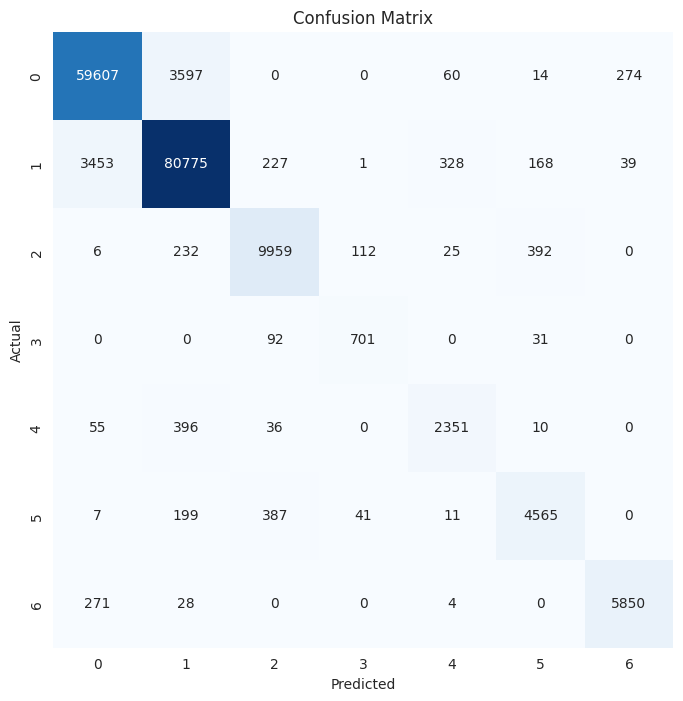

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     63552
           1       0.95      0.95      0.95     84991
           2       0.93      0.93      0.93     10726
           3       0.82      0.85      0.84       824
           4       0.85      0.83      0.84      2848
           5       0.88      0.88      0.88      5210
           6       0.95      0.95      0.95      6153

    accuracy                           0.94    174304
   macro avg       0.90      0.90      0.90    174304
weighted avg       0.94      0.94      0.94    174304



,importance
Elevation,0.417335
Horizontal_Distance_To_Fire_Points,0.130175
Horizontal_Distance_To_Roadways,0.121954
Horizontal_Distance_To_Hydrology,0.053164
Vertical_Distance_To_Hydrology,0.041274
Hillshade_Noon,0.026916
Aspect,0.025055
Hillshade_9am,0.024785
Wilderness_Area_0,0.022550
Hillshade_3pm,0.017973


In [19]:
# Decision Tree with Standard Scaling
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf.fit(X_train, y_train)

evaluate_model(clf, "Decision Tree Classifier", X_test, y_test)
importance_table(clf, X_train, sort = True)

In [29]:
# Manually find and remove irrelevant features with importance < 0.001
clf_table = importance_table(clf.fit(X_train, y_train), X_train, sort = True)
drop_col = clf_table.index[clf_table['importance'] < 0.0001].tolist()

X_train_relevant = X_train.drop(drop_col, axis = 1)
X_test_relevant = X_test.drop(drop_col, axis = 1)

Accuracy (Decision Tree Classifier): 93.94%


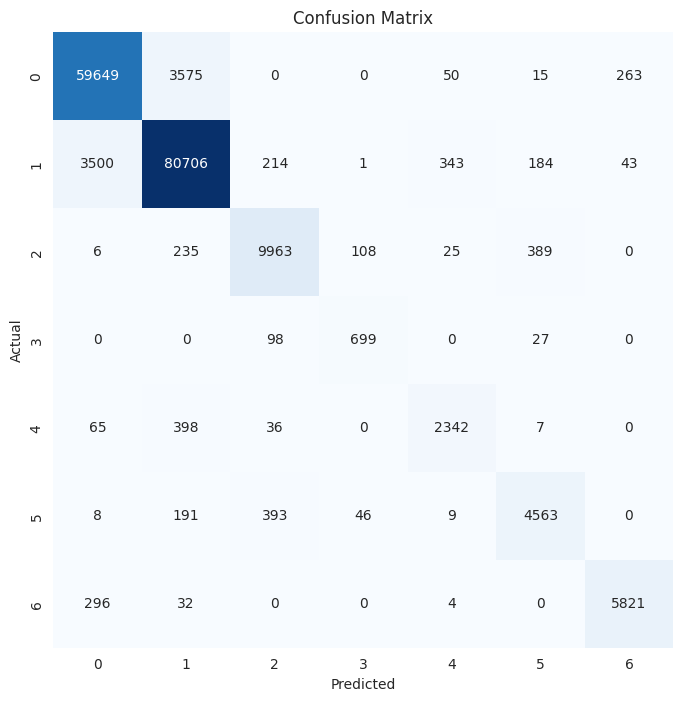

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     63552
           1       0.95      0.95      0.95     84991
           2       0.93      0.93      0.93     10726
           3       0.82      0.85      0.83       824
           4       0.84      0.82      0.83      2848
           5       0.88      0.88      0.88      5210
           6       0.95      0.95      0.95      6153

    accuracy                           0.94    174304
   macro avg       0.90      0.90      0.90    174304
weighted avg       0.94      0.94      0.94    174304



,importance
Elevation,0.417453
Horizontal_Distance_To_Fire_Points,0.130069
Horizontal_Distance_To_Roadways,0.122186
Horizontal_Distance_To_Hydrology,0.052905
Vertical_Distance_To_Hydrology,0.041102
Hillshade_Noon,0.027539
Aspect,0.025154
Hillshade_9am,0.024741
Wilderness_Area_0,0.021410
Hillshade_3pm,0.017728


In [30]:
# Decision Tree with Standard Scaling and relevant features
clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf2.fit(X_train_relevant, y_train)
evaluate_model(clf2, "Decision Tree Classifier", X_test_relevant, y_test)
importance_table(clf2, X_train_relevant, sort = True)

**Finding Hyperparameters take too long to response, so I do not include it here. **

**RANDOM FOREST**

Accuracy (Random Forest Classifier): 95.15%


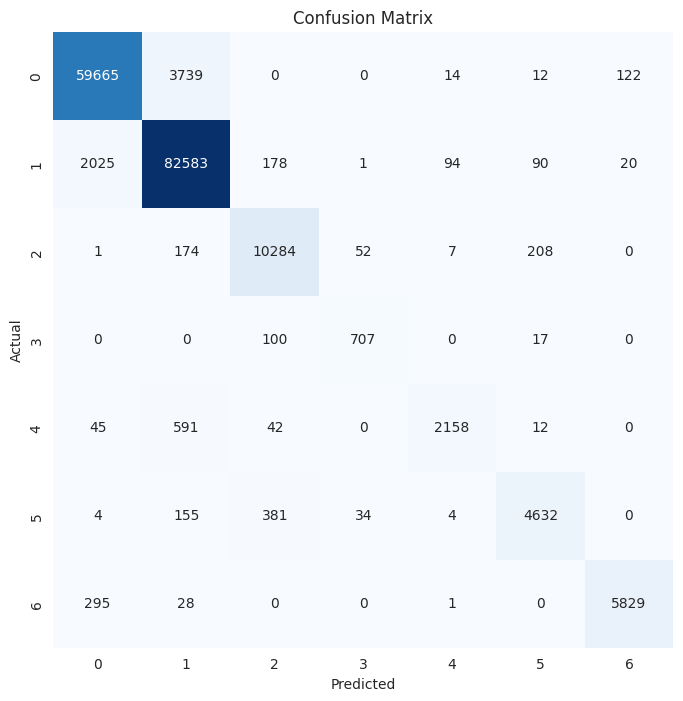

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     63552
           1       0.95      0.97      0.96     84991
           2       0.94      0.96      0.95     10726
           3       0.89      0.86      0.87       824
           4       0.95      0.76      0.84      2848
           5       0.93      0.89      0.91      5210
           6       0.98      0.95      0.96      6153

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



,importance
Elevation,0.242873
Horizontal_Distance_To_Roadways,0.117143
Horizontal_Distance_To_Fire_Points,0.109808
Horizontal_Distance_To_Hydrology,0.060761
Vertical_Distance_To_Hydrology,0.057508
Aspect,0.047895
Hillshade_Noon,0.043361
Hillshade_9am,0.041961
Hillshade_3pm,0.041607
Slope,0.033193


In [40]:
# Random forest with Standard Scaling
rfc1 = RandomForestClassifier(random_state=42)
rfc1.fit(X_train, y_train)

evaluate_model(rfc1, "Random Forest Classifier", X_test, y_test)
importance_table(rfc1, X_train, sort = True)

In [41]:
# Random Forest with Relevant Features (< 0.0005)
rf_table = importance_table(rfc1.fit(X_train, y_train), X_train, sort = True)
drop_col3 = rf_table.index[rf_table['importance'] < 0.0005].tolist()

X_train4 = X_train.drop(drop_col3, axis = 1)
X_test4 = X_test.drop(drop_col3, axis = 1)

Accuracy (Random Forest Classifier): 95.20%


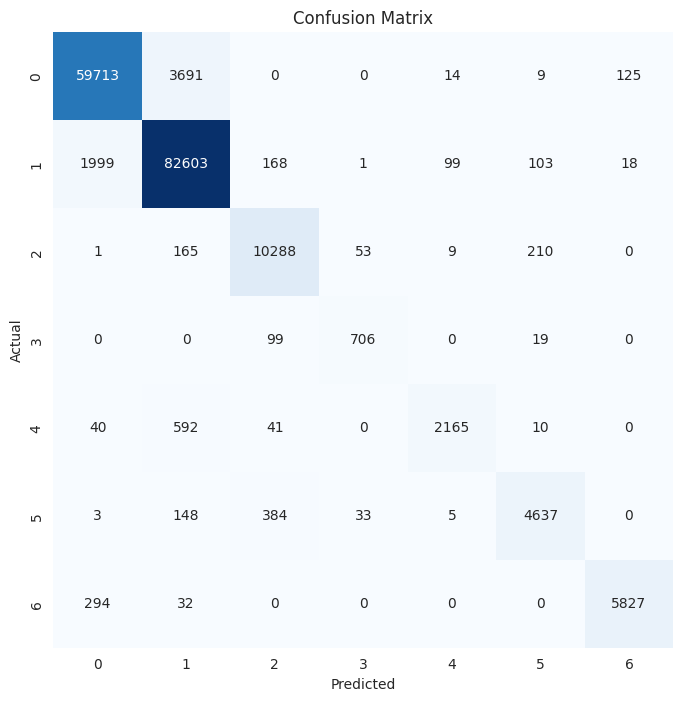

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     63552
           1       0.95      0.97      0.96     84991
           2       0.94      0.96      0.95     10726
           3       0.89      0.86      0.87       824
           4       0.94      0.76      0.84      2848
           5       0.93      0.89      0.91      5210
           6       0.98      0.95      0.96      6153

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



In [42]:
rfc1.fit(X_train4, y_train)

evaluate_model(rfc1, "Random Forest Classifier", X_test4, y_test)

In [11]:
# # Random Forest with Hyperparameters
# rfc1 = RandomForestClassifier(n_estimators = 200, random_state=42)
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 5, 10, 20],
# }

# # Use GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=rfc1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)
# Print best Hyperparameters and accuracy
# from sklearn.metrics import accuracy_score

# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
# best_accuracy = accuracy_score(y_test, best_model.predict(X_test))

# print("Best Hyperparameters:", best_params)
# print("Accuracy:", best_accuracy)

Accuracy (Random Forest Classifier): 95.25%


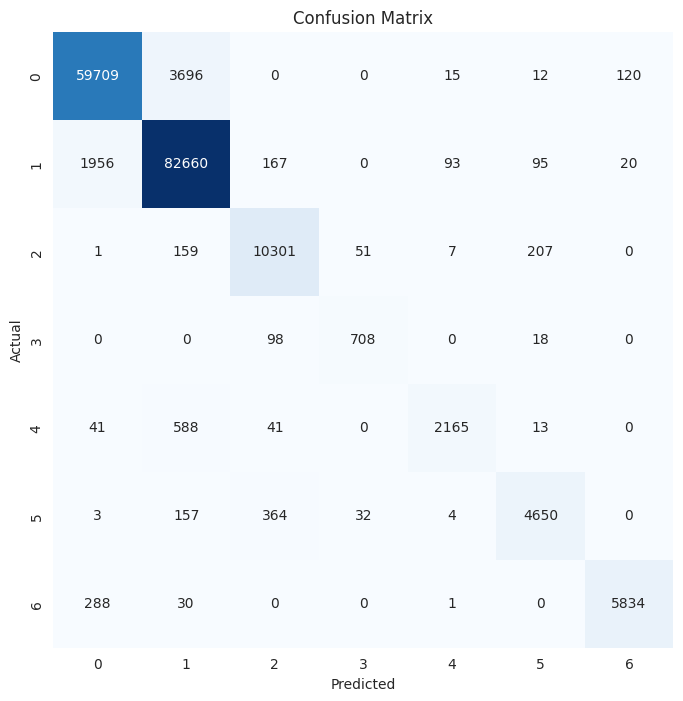

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     63552
           1       0.95      0.97      0.96     84991
           2       0.94      0.96      0.95     10726
           3       0.90      0.86      0.88       824
           4       0.95      0.76      0.84      2848
           5       0.93      0.89      0.91      5210
           6       0.98      0.95      0.96      6153

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304



In [13]:
# Run random Forest with Hyperparameters
rfc2 = RandomForestClassifier(n_estimators = 200, random_state=42)
rfc2.fit(X_train, y_train)
evaluate_model(rfc2, "Random Forest Classifier", X_test, y_test)

**Random Forest works best with Hyperparameter in this case.**

In [ ]:
#AdaBoost with RandomForestClassifier
base_estimator = RandomForestClassifier()
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42)

# Train the AdaBoost model
adaboost.fit(X_train_SMOTE, y_train_SMOTE)

# Make predictions on the test set
y_pred = adaboost.predict(X_test_SMOTE)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost: {accuracy}")

In [19]:
ada = classification_report(y_test, y_pred)
print(ada)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     63552
           1       0.95      0.97      0.96     84991
           2       0.94      0.96      0.95     10726
           3       0.90      0.86      0.88       824
           4       0.95      0.75      0.84      2848
           5       0.93      0.89      0.91      5210
           6       0.98      0.95      0.96      6153

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304

